In [1]:
import numpy as np 
import pandas as pd 
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("qsar_fish_toxicity.csv",header=None,delimiter=';')
df.head()

,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
df.rename({0: 'CIC0', 1: 'SM1_Dz(Z)',2:'GATS1i',3:'NdsCH',4:'NdssC',5:'MLOGP',6:'quantitative response, LC50 [-LOG(mol/L)]'}, axis=1, inplace=True)
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CIC0                                       908 non-null    float64
 1   SM1_Dz(Z)                                  908 non-null    float64
 2   GATS1i                                     908 non-null    float64
 3   NdsCH                                      908 non-null    int64  
 4   NdssC                                      908 non-null    int64  
 5   MLOGP                                      908 non-null    float64
 6   quantitative response, LC50 [-LOG(mol/L)]  908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [6]:
for i in df.columns:
    if(len(df[i].unique()) < 10):
        print(i)
        print(df[i].value_counts())
        print("============================")

NdsCH
0    760
1    107
2     29
4      7
3      5
Name: NdsCH, dtype: int64
NdssC
0    622
1    176
2     81
3     18
4      8
6      2
5      1
Name: NdssC, dtype: int64


In [7]:
df.isnull().sum()

CIC0                                         0
SM1_Dz(Z)                                    0
GATS1i                                       0
NdsCH                                        0
NdssC                                        0
MLOGP                                        0
quantitative response, LC50 [-LOG(mol/L)]    0
dtype: int64

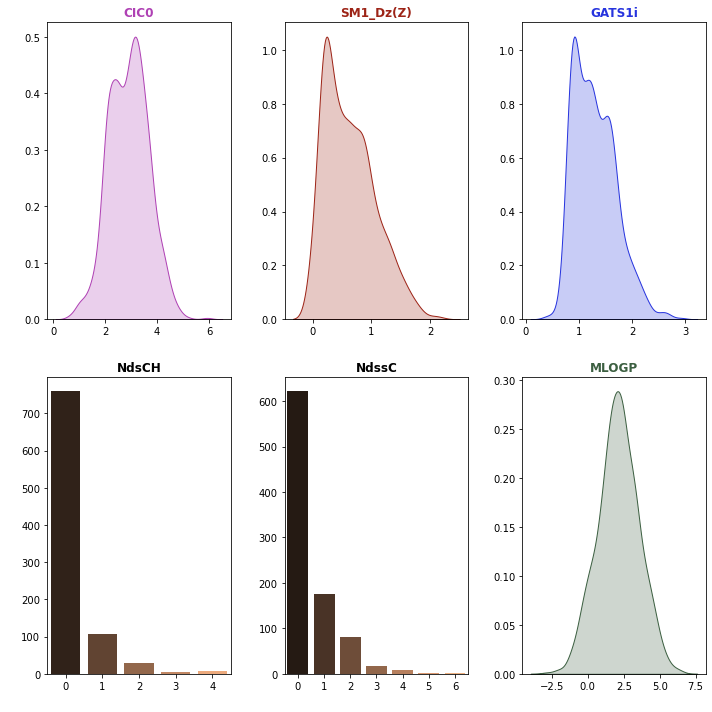

In [8]:
useful_cols = [col for col in df.columns if col not in ['quantitative response, LC50 [-LOG(mol/L)]']]         # TARGET AND ID
cols_dist = [col for col in useful_cols if col not in ['NdssC', 'NdsCH']]  # CATEGORICAL DATA
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
cmap_ = ['magma', 'copper', 'crest']


plt.figure(figsize= (10,10))
for i,col in enumerate(df[useful_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(2,3, i+1) # SUBPLOTS
    if col in cols_dist:
        
        sns.kdeplot(df[col], color = rand_col, fill = rand_col )
        plt.title(col,weight = 'bold', color = rand_col)
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
    else:
        sns.countplot(data = df , x = col, palette = cmap_[random.sample(range(3), 1)[0]] )
        plt.title(col,weight = 'bold', color = 'black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
        
#sns.kdeplot(np.log(df['instrumentalness']), color = rand_col, fill = rand_col )
#plt.tight_layout()
plt.show();

C:\Users\Raunak Kumar\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='SM1_Dz(Z)', ylabel='Density'>

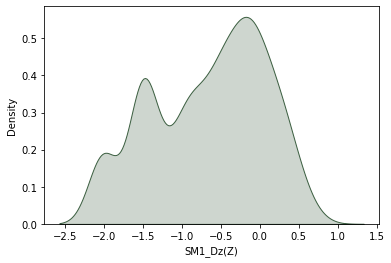

In [9]:
sns.kdeplot(np.log(df['SM1_Dz(Z)']), color = rand_col, fill = rand_col )

<AxesSubplot:xlabel='GATS1i', ylabel='Density'>

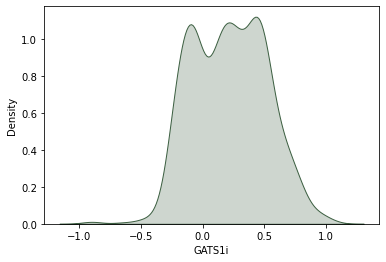

In [10]:
sns.kdeplot(np.log(df['GATS1i']), color = rand_col, fill = rand_col )

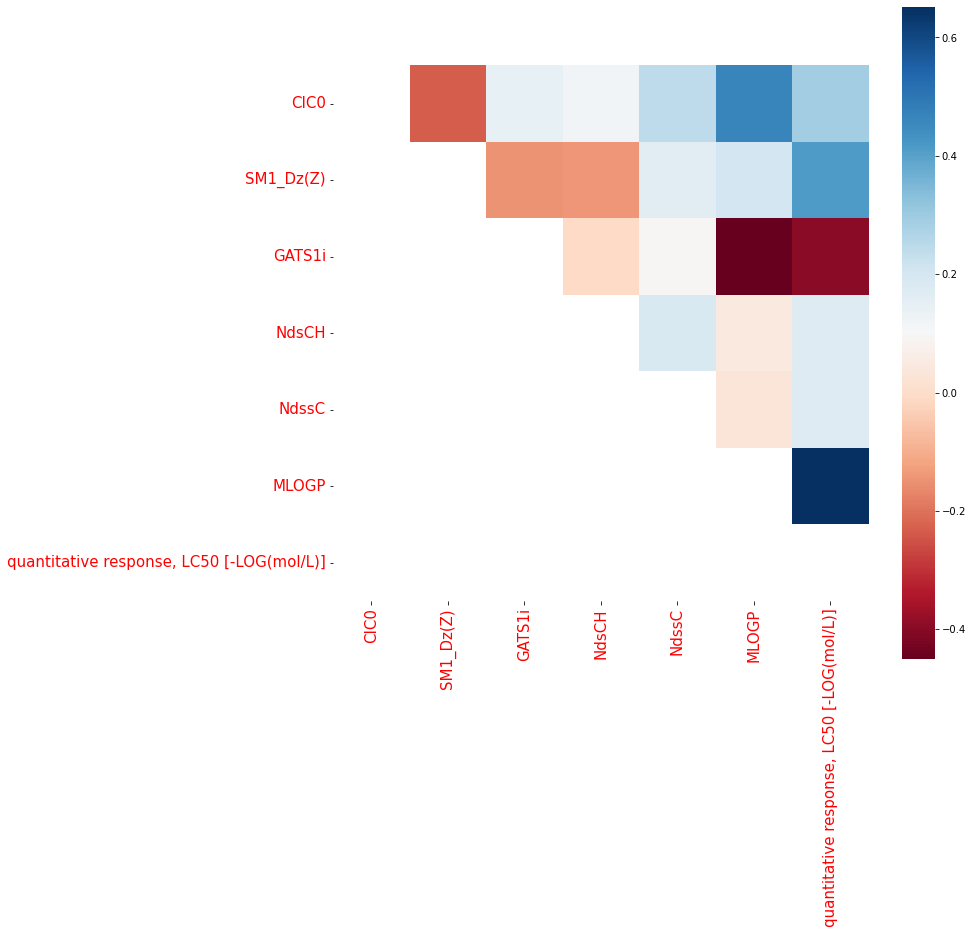

In [11]:
plt.figure(figsize = (12,12))
corr_matrix=df.corr()
 
matrix = np.tril(corr_matrix) # take lower correlation matrix

# Draw the heatmap with the mask
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu')
plt.xticks(size = 15,color = 'red')
plt.yticks(size = 15,  color = 'red');

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['quantitative response, LC50 [-LOG(mol/L)]']),
                                                 df['quantitative response, LC50 [-LOG(mol/L)]'],
                                                 test_size=0.2,
                                                random_state=20)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline

In [14]:
trf1  = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[3,4])
],remainder='passthrough')

In [15]:
# train the model      algo1
from sklearn.tree import DecisionTreeRegressor 

trf2 = DecisionTreeRegressor()

In [16]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [17]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 4])])),
                ('trf2', DecisionTreeRegressor())])

In [18]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [3, 4])]),
 'trf2': DecisionTreeRegressor()}

In [19]:
from sklearn import set_config
set_config(display='diagram')

In [20]:
y_test.shape

(182,)

In [21]:
y_pred = pipe.predict(X_test)
y_pred.shape

(182,)

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1.5858575138400488

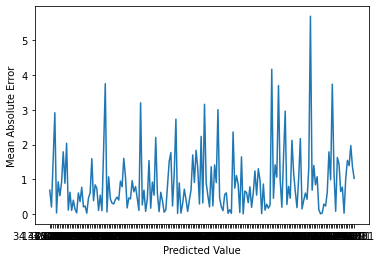

In [23]:
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = list(y_test)
# predicted value
predicted = list(y_pred)
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
	#print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [29]:
# Define the pipeline steps Algo2
scaler = StandardScaler() # Standardize the features
pca = PCA(n_components=3) # Reduce the dimensionality with PCA
reg = LinearRegression() # Fit a linear regression model

# Create the pipeline object
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("reg", reg)])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)
print("Accuracy score =", round(sm.r2_score(y_test, y_pred), 2)*100,"%")

Accuracy score = 51.0 %


In [28]:
# Define the pipeline steps Algo3
scaler = StandardScaler() # Standardize the features
pca = PCA(n_components=3) # Reduce the dimensionality with PCA
knn = KNeighborsRegressor(n_neighbors=5, metric="euclidean") # Fit a KNN model

# Create the pipeline object
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("knn", knn)])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)
print("Accuracy score =", round(sm.r2_score(y_test, y_pred), 2)*100,"%")

Accuracy score = 56.99999999999999 %
